In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
import pandas as pd 
data = pd.read_csv('songs_normalize.csv')

In [3]:
data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


We will convert the 'bool' column to 'int' or 'float' column 

Data Cleaning 

In [5]:
data = data.drop_duplicates()

In [6]:
data.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

Fortunately,there are no missing values among our columns 

Pre_Processing Data 

In [7]:
replace ={
    "explicit":{
        False:"0",
        True:"1",
    }
}

data = data.replace(replace)

In [8]:
data.head(3)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,0,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.355,0.894,95.053,pop
1,blink-182,All The Small Things,167066,0,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.612,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,0,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.251,0.278,136.859,"pop, country"


In [9]:
data['popularity'].describe()

count    1941.000000
mean       59.633179
std        21.501053
min         0.000000
25%        56.000000
50%        65.000000
75%        73.000000
max        89.000000
Name: popularity, dtype: float64

In [10]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [11]:
def process_popularity(df):
    cut_points =[0,30,60,90]
    label_names =['Not_Popularity','Quite_Popularity','Famous_Well_Knowed']
    df['popularity_categories'] = pd.cut(df['popularity'],cut_points,labels=label_names)
    return df 
data = process_popularity(data)
data = data.drop('popularity',axis=1)

In [12]:
data['popularity_categories'].value_counts()

Famous_Well_Knowed    1250
Quite_Popularity       498
Not_Popularity          67
Name: popularity_categories, dtype: int64

In [13]:
data = create_dummies(data,'popularity_categories')
data = data.drop('popularity_categories',axis=1)

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

In [14]:
data['danceability'].value_counts(dropna=False)

0.791    11
0.687    11
0.736    10
0.660    10
0.656    10
         ..
0.375     1
0.410     1
0.356     1
0.285     1
0.887     1
Name: danceability, Length: 565, dtype: int64

In [15]:
def process_dance(df):
    cut_points =[0,0.5,1]
    label_names =['Not_suitable_For_dancing','Suitable_For_dancing']
    df['danceability_cate'] = pd.cut(df['danceability'],cut_points,labels=label_names)
    return df 

In [16]:
data = process_dance(data)
data = data.drop('danceability',axis=1)

In [17]:
data = create_dummies(data,'danceability_cate')
data = data.drop('danceability_cate',axis=1)

In [18]:
data.head()

,artist,song,duration_ms,explicit,year,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,genre,popularity_categories_Not_Popularity,popularity_categories_Quite_Popularity,popularity_categories_Famous_Well_Knowed,danceability_cate_Not_suitable_For_dancing,danceability_cate_Suitable_For_dancing
0,Britney Spears,Oops!...I Did It Again,211160,0,2000,0.834,1,-5.444,0,0.0437,...,0.000018,0.3550,0.894,95.053,pop,0,0,1,0,1
1,blink-182,All The Small Things,167066,0,1999,0.897,0,-4.918,1,0.0488,...,0.000000,0.6120,0.684,148.726,"rock, pop",0,0,1,1,0
2,Faith Hill,Breathe,250546,0,1999,0.496,7,-9.007,1,0.0290,...,0.000000,0.2510,0.278,136.859,"pop, country",0,0,1,0,1
3,Bon Jovi,It's My Life,224493,0,2000,0.913,0,-4.063,0,0.0466,...,0.000013,0.3470,0.544,119.992,"rock, metal",0,0,1,0,1
4,*NSYNC,Bye Bye Bye,200560,0,2000,0.928,8,-4.806,0,0.0516,...,0.001040,0.0845,0.879,172.656,pop,0,0,1,0,1


key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1

In [19]:
data['key'].value_counts(dropna=False)

1     257
0     195
7     194
11    192
5     174
8     169
2     154
9     152
6     148
10    124
4     123
3      59
Name: key, dtype: int64

In [20]:
data['key'] = data['key'].astype('string')

In [21]:
replace ={
    "key":{
       "0": "C",
       "1": "C♯, D♭",
       "2" : "D",
       "3" :"D♯, E♭",
       "4" : "E",
       "5" : "F",
       "6" : "F♯, G♭",
       "7" : "G",
       "8" : "G♯, A♭",
       "9" : "A",
       "10" : "A♯, B♭",
       "11" : "B",
    
    }
}

data = data.replace(replace)

In [22]:
data['key'].value_counts(dropna = False)

C♯, D♭    257
C         195
G         194
B         192
F         174
G♯, A♭    169
D         154
A         152
F♯, G♭    148
A♯, B♭    124
E         123
D♯, E♭     59
Name: key, dtype: Int64

In [23]:
data = create_dummies(data,'key')
data = data.drop('key',axis=1)

In [24]:
data['loudness'].describe()

count    1941.000000
mean       -5.514082
std         1.938950
min       -20.514000
25%        -6.490000
50%        -5.285000
75%        -4.168000
max        -0.276000
Name: loudness, dtype: float64

We will drop the loudness column because it isn't helpful for our prediction 

In [25]:
data = data.drop('loudness',axis=1)

In [26]:
replace_1 ={
    "mode":{
        0 : "Minor",
        1 : "Major",
    }
}

data = data.replace(replace_1)

In [27]:
data = create_dummies(data,"mode")

data = data.drop("mode",axis=1)

In [28]:
data.head()

,artist,song,duration_ms,explicit,year,energy,speechiness,acousticness,instrumentalness,liveness,...,"key_C♯, D♭",key_D,"key_D♯, E♭",key_E,key_F,"key_F♯, G♭",key_G,"key_G♯, A♭",mode_Major,mode_Minor
0,Britney Spears,Oops!...I Did It Again,211160,0,2000,0.834,0.0437,0.3000,0.000018,0.3550,...,1,0,0,0,0,0,0,0,0,1
1,blink-182,All The Small Things,167066,0,1999,0.897,0.0488,0.0103,0.000000,0.6120,...,0,0,0,0,0,0,0,0,1,0
2,Faith Hill,Breathe,250546,0,1999,0.496,0.0290,0.1730,0.000000,0.2510,...,0,0,0,0,0,0,1,0,1,0
3,Bon Jovi,It's My Life,224493,0,2000,0.913,0.0466,0.0263,0.000013,0.3470,...,0,0,0,0,0,0,0,0,0,1
4,*NSYNC,Bye Bye Bye,200560,0,2000,0.928,0.0516,0.0408,0.001040,0.0845,...,0,0,0,0,0,0,0,1,0,1


speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

In [29]:
data['speechiness'].describe()

count    1941.000000
mean        0.103783
std         0.096148
min         0.023200
25%         0.039700
50%         0.061000
75%         0.129000
max         0.576000
Name: speechiness, dtype: float64

In [30]:
def process_speechiness(df):
    cut_points =[0,0.33,0.66,1]
    label_names =['non_speech_track','both_music_and_speech','contain_only_spoken_words']
    df['speechiness_cate'] = pd.cut(df['speechiness'],cut_points,labels=label_names)
    return df 

In [31]:
data = process_speechiness(data)
data = data.drop('speechiness',axis=1)

In [32]:
data = create_dummies(data,'speechiness_cate')
data = data.drop('speechiness_cate',axis=1)

acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.


In [33]:
def process_acousticness(df):
    cut_points =[0,0.4,0.7,1]
    label_names =['non_acoustic','similar_acoustic','acoustic']
    df['acousticness_cate'] = pd.cut(df['acousticness'],cut_points,labels=label_names)
    return df 

In [34]:
data = process_acousticness(data)
data = data.drop('acousticness',axis=1)

In [35]:
data = create_dummies(data,'acousticness_cate')
data = data.drop('acousticness_cate',axis=1)

In [36]:
data['instrumentalness'].value_counts()

0.000000    1052
0.000001       3
0.000108       3
0.000003       3
0.000002       3
            ... 
0.002480       1
0.000502       1
0.000006       1
0.001090       1
0.002440       1
Name: instrumentalness, Length: 772, dtype: int64

We will drop instrumentalness column

In [37]:
data = data.drop('instrumentalness',axis=1)

In [38]:
data['liveness'].describe()

count    1941.000000
mean        0.181726
std         0.140910
min         0.021500
25%         0.088400
50%         0.124000
75%         0.242000
max         0.853000
Name: liveness, dtype: float64

liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

In [39]:
def process_liveness(df):
    cut_points =[0,0.5,1]
    label_names =['non_live','live']
    df['liveness_cate'] = pd.cut(df['liveness'],cut_points,labels=label_names)
    df = df.drop('liveness',axis=1)
    return df
data = process_liveness(data)


In [40]:
data = create_dummies(data,'liveness_cate')
data = data.drop('liveness_cate',axis =1)

valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


In [41]:
def process_valence(df):
    cut_points =[0,0.4,0.7,1]
    label_names =['Sad','Normal','Happy']
    df['valence_cate'] = pd.cut(df['valence'],cut_points,labels=label_names)
    df = df.drop('valence',axis=1)
    return df
data = process_valence(data)

In [42]:
data['valence_cate'].value_counts()

Normal    862
Happy     563
Sad       516
Name: valence_cate, dtype: int64

In [43]:
data = create_dummies(data,'valence_cate')
data = data.drop('valence_cate',axis=1)

In [44]:
data.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'energy', 'tempo',
       'genre', 'popularity_categories_Not_Popularity',
       'popularity_categories_Quite_Popularity',
       'popularity_categories_Famous_Well_Knowed',
       'danceability_cate_Not_suitable_For_dancing',
       'danceability_cate_Suitable_For_dancing', 'key_A', 'key_A♯, B♭',
       'key_B', 'key_C', 'key_C♯, D♭', 'key_D', 'key_D♯, E♭', 'key_E', 'key_F',
       'key_F♯, G♭', 'key_G', 'key_G♯, A♭', 'mode_Major', 'mode_Minor',
       'speechiness_cate_non_speech_track',
       'speechiness_cate_both_music_and_speech',
       'speechiness_cate_contain_only_spoken_words',
       'acousticness_cate_non_acoustic', 'acousticness_cate_similar_acoustic',
       'acousticness_cate_acoustic', 'liveness_cate_non_live',
       'liveness_cate_live', 'valence_cate_Sad', 'valence_cate_Normal',
       'valence_cate_Happy'],
      dtype='object')

We will drop 'year' column because we find it isn't helpful for predicting our target

In [45]:
data = data.drop('year',axis=1)

In [46]:
data.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'energy', 'tempo', 'genre',
       'popularity_categories_Not_Popularity',
       'popularity_categories_Quite_Popularity',
       'popularity_categories_Famous_Well_Knowed',
       'danceability_cate_Not_suitable_For_dancing',
       'danceability_cate_Suitable_For_dancing', 'key_A', 'key_A♯, B♭',
       'key_B', 'key_C', 'key_C♯, D♭', 'key_D', 'key_D♯, E♭', 'key_E', 'key_F',
       'key_F♯, G♭', 'key_G', 'key_G♯, A♭', 'mode_Major', 'mode_Minor',
       'speechiness_cate_non_speech_track',
       'speechiness_cate_both_music_and_speech',
       'speechiness_cate_contain_only_spoken_words',
       'acousticness_cate_non_acoustic', 'acousticness_cate_similar_acoustic',
       'acousticness_cate_acoustic', 'liveness_cate_non_live',
       'liveness_cate_live', 'valence_cate_Sad', 'valence_cate_Normal',
       'valence_cate_Happy'],
      dtype='object')

In [47]:
data[['duration_ms','energy', 'tempo']].describe(include='all',percentiles=[])

,duration_ms,energy,tempo
count,1941.000000,1941.000000,1941.000000
mean,228594.973725,0.721549,120.158442
std,39249.796103,0.152872,26.990475
min,113000.000000,0.054900,60.019000
50%,223186.000000,0.739000,120.028000
max,484146.000000,0.999000,210.851000


In [48]:
data = create_dummies(data,'genre')
data = data.drop('genre',axis=1)

MACHINE LEARNING MODEL 

Firslt,split our data to train and test df 

In [49]:
import numpy as np
# Randomize order of rows in data frame.
shuffled_index = np.random.permutation(data.index)
rand_df = data.reindex(shuffled_index)
# Divide number of rows in half and round.
last_train_row = int(len(rand_df) / 2)
    
# Select the first half and set as training set.
# Select the second half and set as test set.
train_df = rand_df.iloc[0:last_train_row]
test_df = rand_df.iloc[last_train_row:]

Our target for ML Model is to predict which songs is considered as 'explicit'.The others columns except from 'artist' and 'song' will be our features for predict 

In [50]:
features = train_df.columns.drop(['artist','song','explicit'])

In [51]:
len(features)

92

Firstly,we will use Cross Validation to check our accuracy

In [52]:
from sklearn.model_selection import cross_val_score

all_X = train_df[features]
all_y = train_df['explicit']

lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=10)
accuracy = scores.mean()
print(accuracy)

0.7371134020618557


Our accuracy is nearly 74%

C:\Users\Admin\AppData\Local\Temp\ipykernel_15144\559837863.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 9837 (\N{MUSIC FLAT SIGN}) missing from current font.
  fig.canvas.draw()
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:660: UserWarning: Glyph 9837 (\N{MUSIC FLAT SIGN}) missing from current font.
  bboxes = [l.get_window_extent() for l in labels]
C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 98

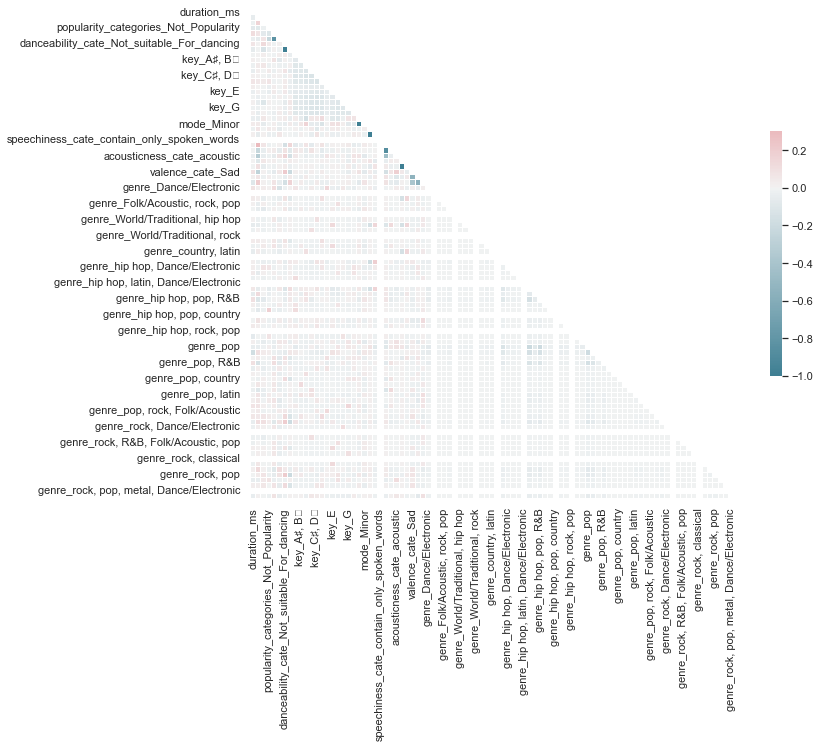

In [53]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

plot_correlation_heatmap(train_df[features])

Fortunately,there are no Collinearity among our features 

We can use RFECV class for selecting the set of features which mostly suitable for predicting our target column 

In [58]:
from sklearn.feature_selection import RFECV

all_X = train_df[features]
all_y = train_df["explicit"]
lr = LogisticRegression(solver='lbfgs', max_iter=2000)
selector = RFECV(lr,cv=10)
selector.fit(all_X,all_y)

optimized_columns = all_X.columns[selector.support_]


In [59]:
len(optimized_columns)

35

In [60]:
all_X = train_df[optimized_columns]
all_y = train_df["explicit"]
lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=10)
accuracy = scores.mean()
print(accuracy)

0.7371134020618557


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

def select_model(df,features):
    
    all_X = df[features]
    all_y = df["explicit"]

    # List of dictionaries, each containing a model name,
    # it's estimator and a dict of hyperparameters
    models = [
        {
            "name": "LogisticRegression",
            "estimator": LogisticRegression(solver='lbfgs', max_iter=1000),
            "hyperparameters":
                {
                    "solver": ["newton-cg", "lbfgs", "liblinear"]
                }
        },
        {
            "name": "KNeighborsClassifier",
            "estimator": KNeighborsClassifier(),
            "hyperparameters":
                {
                    "n_neighbors": range(1,20,2),
                    "weights": ["distance", "uniform"],
                    "algorithm": ["ball_tree", "kd_tree", "brute"],
                    "p": [1,2]
                }
        },
        {
            "name": "RandomForestClassifier",
            "estimator": RandomForestClassifier(random_state=1),
            "hyperparameters":
                {
                    "n_estimators": [4, 6, 9],
                    "criterion": ["entropy", "gini"],
                    "max_depth": [2, 5, 10],
                    "max_features": ["log2", "sqrt"],
                    "min_samples_leaf": [1, 5, 8],
                    "min_samples_split": [2, 3, 5]

                }
        }
    ]

    for model in models:
        print(model['name'])
        print('-'*len(model['name']))

        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            cv=10)
        grid.fit(all_X,all_y)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_

        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))

    return models

result = select_model(train_df,features)

LogisticRegression
------------------


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Admin\AppData\Local\Pro

Best Score: 0.8391752577319587
Best Parameters: {'solver': 'newton-cg'}

KNeighborsClassifier
--------------------
Best Score: 0.731958762886598
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 19, 'p': 1, 'weights': 'uniform'}

RandomForestClassifier
----------------------
Best Score: 0.8206185567010309
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 9}



We can add feature {'solver': 'newton-cg'} for LogisticRegression to increase our ML model's accuracy

In [64]:
all_X = train_df[optimized_columns]
all_y = train_df["explicit"]
lr = LogisticRegression(solver= 'newton-cg',max_iter=20000)
scores = cross_val_score(lr, all_X, all_y, cv=10)
accuracy = scores.mean()

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Admin\AppData\Local\Pro

In [65]:
print(accuracy)

0.8443298969072164


Our new accuracy has increased to nearly 84% which is good for our prediction

Beside using LogisticRegression,we can use RandomForestClassifier whose accuracy is nearly 80%

In [68]:
all_X = train_df[optimized_columns]
all_y = train_df["explicit"]
lr = RandomForestClassifier(criterion='gini', max_depth=10, max_features='sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators=9)
scores = cross_val_score(lr, all_X, all_y, cv=10)
accuracy = scores.mean()

In [69]:
print(accuracy)

0.8195876288659794


In [71]:
all_X = train_df[features]
all_y = train_df['explicit']
lr = LogisticRegression(solver= 'newton-cg',max_iter=20000)
lr.fit(all_X,all_y)
test_predictions = lr.predict(test_df[features])

test_song = test_df["song"]
submission_df = {"Song_name": test_song,
                 "explicit": test_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv("submission.csv",index=False)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Admin\AppData\Local\Pro